#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'0.24.2'

In [2]:
!pip install pymc3==3.10
!pip install arviz==0.10
!pip install pgmpy

In [2]:
import pymc3 as pm
import arviz as az

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [4]:
data.shape

(70000, 13)

In [5]:
df = data.sample(frac=0.25)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
54271,77391,23381,1,162,70.0,120,80,3,1,0,0,1,1
63189,90231,18135,2,183,112.0,120,80,1,1,0,0,1,1
37654,53772,15983,2,168,68.0,120,80,1,1,0,0,1,0
69888,99825,22050,1,165,58.0,150,90,3,1,0,0,1,1
38081,54355,19885,1,178,74.0,150,100,1,1,0,0,1,1


In [7]:
df.shape

(17500, 13)

In [8]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 54271 to 60641
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


54271    23381
63189    18135
37654    15983
69888    22050
38081    19885
         ...  
1461     22556
15816    19900
58422    18959
7585     21231
60641    18939
Name: age, Length: 17500, dtype: int64

In [9]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
54271,77391,1,162,70.0,120,80,3,1,0,0,1,1,64.057534
63189,90231,2,183,112.0,120,80,1,1,0,0,1,1,49.684932
37654,53772,2,168,68.0,120,80,1,1,0,0,1,0,43.789041
69888,99825,1,165,58.0,150,90,3,1,0,0,1,1,60.410959
38081,54355,1,178,74.0,150,100,1,1,0,0,1,1,54.479452


In [10]:
df['height'] = df['height']/100

In [11]:
df['height']

54271    1.62
63189    1.83
37654    1.68
69888    1.65
38081    1.78
         ... 
1461     1.74
15816    1.60
58422    1.65
7585     1.49
60641    1.78
Name: height, Length: 17500, dtype: float64

In [12]:
df['bmi'] = df['weight']/((df['height'])**2)

In [13]:
del df['weight']
del df['height']

In [14]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
54271,77391,1,120,80,3,1,0,0,1,1,64.057534,26.672763
63189,90231,2,120,80,1,1,0,0,1,1,49.684932,33.443817
37654,53772,2,120,80,1,1,0,0,1,0,43.789041,24.092971
69888,99825,1,150,90,3,1,0,0,1,1,60.410959,21.303949
38081,54355,1,150,100,1,1,0,0,1,1,54.479452,23.355637


In [15]:
 df['bmi']

54271    26.672763
63189    33.443817
37654    24.092971
69888    21.303949
38081    23.355637
           ...    
1461     24.441802
15816    28.125000
58422    24.609734
7585     31.530111
60641    19.568236
Name: bmi, Length: 17500, dtype: float64

In [16]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
54271,1,120,80,3,1,0,0,1,1,26.672763,64.0
63189,2,120,80,1,1,0,0,1,1,33.443817,50.0
37654,2,120,80,1,1,0,0,1,0,24.092971,44.0
69888,1,150,90,3,1,0,0,1,1,21.303949,60.0
38081,1,150,100,1,1,0,0,1,1,23.355637,54.0


In [17]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
54271,1,120,80,3,1,0,0,1,1,27.0,64.0
63189,2,120,80,1,1,0,0,1,1,33.0,50.0
37654,2,120,80,1,1,0,0,1,0,24.0,44.0
69888,1,150,90,3,1,0,0,1,1,21.0,60.0
38081,1,150,100,1,1,0,0,1,1,23.0,54.0


In [18]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
54271,1,120,80,3,1,0,0,1,1,27.0,64.0
63189,2,120,80,1,1,0,0,1,1,33.0,50.0
37654,2,120,80,1,1,0,0,1,0,24.0,44.0
69888,1,150,90,3,1,0,0,1,1,21.0,60.0
38081,1,150,100,1,1,0,0,1,1,23.0,54.0


In [19]:
scaler = MinMaxScaler()

In [20]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [21]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
54271,0.0,0.016973,0.008,1.0,0.0,0.0,0.0,1.0,1.0,0.148148,0.961538
63189,1.0,0.016973,0.008,0.0,0.0,0.0,0.0,1.0,1.0,0.192593,0.423077
37654,1.0,0.016973,0.008,0.0,0.0,0.0,0.0,1.0,0.0,0.125926,0.192308
69888,0.0,0.019095,0.009,1.0,0.0,0.0,0.0,1.0,1.0,0.103704,0.807692
38081,0.0,0.019095,0.010,0.0,0.0,0.0,0.0,1.0,1.0,0.118519,0.576923


Text(0.5, 1.0, 'Correlation Plot')

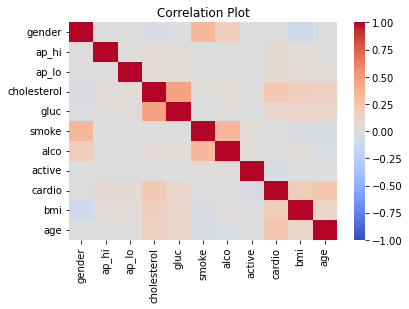

In [22]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

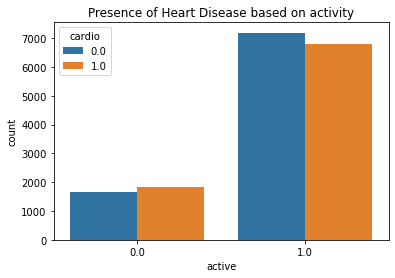

In [23]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

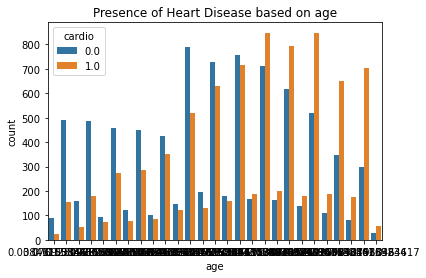

In [24]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

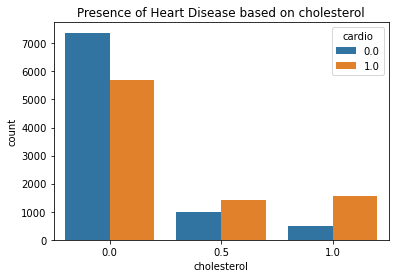

In [25]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [26]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
"""""X = df[list(df.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)'"""""
#High VIF indicates that there's multicollinearity

,VIF,Column
1,13.537926,ap_hi
10,10.399617,age
9,5.796923,bmi
7,4.594837,active
8,2.327603,cardio
0,1.753593,gender
3,1.707404,cholesterol
4,1.452621,gluc
5,1.377874,smoke
2,1.297861,ap_lo


## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA) **OPTIONAL**
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_train = dt.predict(X_train)

In [32]:
print("Accuracy Train", metrics.accuracy_score(y_train, pred_train))

Accuracy Train 0.9243265306122449


In [33]:
pred = dt.predict(X_test)

In [34]:
print("Accuracy Test", metrics.accuracy_score(y_test, pred))

Accuracy Test 0.6388571428571429


In [35]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66      2662
         1.0       0.65      0.59      0.62      2588

    accuracy                           0.64      5250
   macro avg       0.64      0.64      0.64      5250
weighted avg       0.64      0.64      0.64      5250



### Grid Search for Decision Trees

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [37]:
RF = RandomForestClassifier()

In [38]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
pred = RF.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9242448979591836

In [40]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.6921904761904762

In [41]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      2662
         1.0       0.70      0.66      0.68      2588

    accuracy                           0.69      5250
   macro avg       0.69      0.69      0.69      5250
weighted avg       0.69      0.69      0.69      5250



### Grid Search for Random Forest Classifier

In [42]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [43]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [44]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200],
                         'min_samples_split': [100, 500, 1000, 2000],
                         'n_estimators': [100, 500, 1000]})

In [45]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [46]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [48]:
rf_pred = rf.predict(X_test)

In [49]:
print(confusion_matrix(y_test, rf_pred))

[[2092  570]
 [ 868 1720]]


In [50]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.74      2662
         1.0       0.75      0.66      0.71      2588

    accuracy                           0.73      5250
   macro avg       0.73      0.73      0.72      5250
weighted avg       0.73      0.73      0.72      5250



Shows an accuracy of 0.73 and precision of 0.75 and recall of 0.66

## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
g = GaussianNB()

In [53]:
g.fit(X_train, y_train)

GaussianNB()

In [54]:
pred = g.predict(X_train)
metrics.accuracy_score(y_train, pred)

0.5811428571428572

In [55]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5902857142857143

In [56]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.56      0.93      0.70      2662
         1.0       0.77      0.24      0.37      2588

    accuracy                           0.59      5250
   macro avg       0.66      0.59      0.53      5250
weighted avg       0.66      0.59      0.53      5250



### Grid Search for Naive Bayes

In [97]:
from sklearn.metrics import classification_report

In [86]:
parameters = {
    "priors": [None],
    "var_smoothing": np.logspace(0,-9, num = 100)
}

In [87]:
grid = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [89]:
grid.best_estimator_

GaussianNB(var_smoothing=0.005336699231206307)

In [90]:
GNB = GaussianNB(var_smoothing=0.657933224657568)

In [93]:
GNBNew_pred = g.predict(X_test)

In [95]:
print(confusion_matrix(y_test, GNBNew_pred))

[[2479  183]
 [1968  620]]


In [100]:
print(classification_report(y_test, GNBNew_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.93      0.70      2662
         1.0       0.77      0.24      0.37      2588

    accuracy                           0.59      5250
   macro avg       0.66      0.59      0.53      5250
weighted avg       0.66      0.59      0.53      5250



## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

In [ ]:
estimator.fit(X_train,y_train)

In [ ]:
pred = estimator.predict(X_train)

In [ ]:
svm = metrics.accuracy_score(y_train,pred)

In [ ]:
svm_pred2 = estimator.predict(X_test)

In [ ]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

In [ ]:
print(metrics.classification_report(y_test, svm_pred2))

### Grid Search for Support Vector Machines

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [ ]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [ ]:
cv_1.fit(X_train, y_train)

In [ ]:
cv_1.best_estimator_

In [ ]:
svc = SVC(C=1000, kernel='linear')

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, svc_pred))

In [ ]:
print(metrics.classification_report(y_test, svc_pred))

## Ada Boost Classifier ##

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [61]:
from sklearn.metrics import accuracy_score

In [58]:
AdaBoostClassifier()

AdaBoostClassifier()

In [59]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [62]:
abc_pred_train = abc.predict(X_train)
accuracy_score(y_train, y_pred=abc_pred_train) #training accuracy

0.7290612244897959

In [63]:
abc_pred_test = abc.predict(X_test)
accuracy_score(y_test, y_pred=abc_pred_test) #testing accuracy

0.7232380952380952

In [65]:
cm_abc = confusion_matrix(y_test, abc_pred_test)
print(cm_abc)

[[2202  460]
 [ 993 1595]]


In [67]:
print(metrics.classification_report(y_true = y_test, y_pred = abc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      2662
           1       0.78      0.62      0.69      2588

    accuracy                           0.72      5250
   macro avg       0.73      0.72      0.72      5250
weighted avg       0.73      0.72      0.72      5250



## Ada Boost Grid Search ##

In [77]:
parameters = {
    'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators': [50, 60, 70, 80, 90]
}

In [78]:
ab_gs = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)

In [79]:
ab_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90]})

In [80]:
ab_gs.best_estimator_

AdaBoostClassifier(learning_rate=6)

In [81]:
ab_1 = AdaBoostClassifier(learning_rate=6)

In [82]:
ab_1.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=6)

In [83]:
ab_1_pred = ab_1.predict(X_test)

In [84]:
print(confusion_matrix(y_test, ab_1_pred))

[[2662    0]
 [2588    0]]


In [85]:
print(metrics.classification_report(y_test, ab_1_pred))

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67      2662
         1.0       0.00      0.00      0.00      2588

    accuracy                           0.51      5250
   macro avg       0.25      0.50      0.34      5250
weighted avg       0.26      0.51      0.34      5250



/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machines (PCA) **OPTIONAL**



In [101]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

[0.30778018 0.51219174 0.70523357 0.80133198 0.88299978 0.9482875
 0.99749101 0.99944964 0.99981022 1.        ]


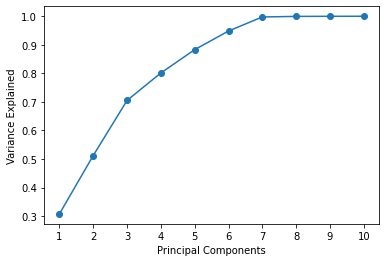

In [104]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [105]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

In [107]:
from sklearn.svm import SVC

In [108]:
estimator_svc = SVC(kernel ='rbf')

In [109]:
estimator_svc.fit(X_train_pca,y_train)

SVC()

In [110]:
pred = estimator_svc.predict(X_train_pca)

In [111]:
svm = metrics.accuracy_score(y_train,pred)

In [113]:
pred2 = estimator_svc.predict(X_test)

In [114]:
svm1 = metrics.accuracy_score(y_test,pred2)

In [115]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6417142857142857
Testing Accuracy: 0.4803809523809524


In [117]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.37      0.04      0.07      2662
         1.0       0.49      0.94      0.64      2588

    accuracy                           0.48      5250
   macro avg       0.43      0.49      0.35      5250
weighted avg       0.43      0.48      0.35      5250



## SVM PCA Grid Search ##

In [118]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [119]:
gs = GridSearchCV(estimator = estimator_svc, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [120]:
gs.fit(X_train_pca2, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 1]})

In [121]:
gs.best_estimator_

SVC(C=1000, gamma=1)

In [122]:
pca_new =SVC(C = 1000, gamma = 1)

In [125]:
pca_new.fit(X_train_pca2 ,y_train)

SVC(C=1000, gamma=1)

In [126]:
pca_new1 = pca_new.predict(X_test_pca2)

In [128]:
print(metrics.classification_report(y_test, pca_new1))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      2662
         1.0       0.72      0.65      0.68      2588

    accuracy                           0.70      5250
   macro avg       0.70      0.70      0.70      5250
weighted avg       0.70      0.70      0.70      5250



## Final Data Visualizations